# Predicting Gender of a Twitter User from Account Description
Having an online presence is almost as essential as having a birth certificate these days, because unless you do, nobody knows who you are. One of the first things you do when you create an account is setting up your profile, it's supposed to capture the essence of who you are because that's what people will relate to you with. Through this project we will be attempting to predict a Twitter user's gender using their profile description. The data we will be using was retrieved from Kaggle and each entry gives various characteristics about a profile such as the profile description, tweet count, gender, sidebar color, etc. We will be perfroming some exploratory data analysis to see if we can find some correlation in the data followed by cleaning of the text data in the profile description. We will then be using the vectorized format of this text data to predict the user's gender using some popular Machine Learning models. The model with the best accuracy will be our final model.

## Contents
1. Exploratory Data Analysis
2. Cleaning Text Data
3. Implememting ML Models
4. Conclusion

### 1. Exploratory Data Analysis
We will be using the "Twitter Gender Prediction" dataset which we downloaded from Kaggle. Each row in our dataset represents a Twitter user and provides details about their profile. Let us perform some initial cleaning of the data and then try and find some trends separating the different gender groups.

In [1]:
# Loading Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Setting Seaborn Theme for Charts
sns.set_theme()

In [2]:
# Reading the Required Datasets
profile_df = pd.read_csv("twitter_data.csv")

In [3]:
# Summary of Twitter Profile Dataset
print(profile_df.info())
profile_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,���It felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
5,815719231,False,finalized,3,10/27/15 1:47,female,1.0000,yes,1.0,3/11/10 18:14,...,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/15 12:40,6.587300e+17,New York Gritty,Central Time (US & Canada)
6,815719232,False,finalized,3,10/27/15 1:57,brand,1.0000,yes,1.0,4/24/08 13:03,...,https://pbs.twimg.com/profile_images/528547133...,0,0,@BpackEngineer Thank you for your patience whi...,NaN,13354,10/26/15 12:40,6.587300e+17,Worldwide,Eastern Time (US & Canada)
7,815719233,False,finalized,3,10/26/15 23:48,male,1.0000,yes,1.0,12/3/12 21:54,...,https://pbs.twimg.com/profile_images/508875440...,0,C0DEED,Gala Bingo clubs bought for �241m: The UK's la...,NaN,112117,10/26/15 12:40,6.587300e+17,NaN,NaN
8,815719234,False,finalized,3,10/27/15 1:52,female,1.0000,yes,1.0,9/8/15 4:50,...,https://pbs.twimg.com/profile_images/658670112...,0,0,@_Aphmau_ the pic defines all mcd fangirls/fan...,NaN,482,10/26/15 12:40,6.587300e+17,NaN,NaN
9,815719235,False,finalized,3,10/27/15 1:49,female,1.0000,yes,1.0,5/13/11 3:32,...,https://pbs.twimg.com/profile_images/513327289...,0,FFFFFF,@Evielady just how lovely is the tree this yea...,NaN,26085,10/26/15 12:40,6.587300e+17,"Nottingham, England.",Amsterdam


In [4]:
# Checking No. of Entries for Each Gender
profile_df['gender'].value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [5]:
# Keeping Only Male, Female and Brand Values
profile_df = profile_df.dropna(subset=['gender','description'])
profile_df = profile_df[profile_df['gender'] != 'unknown']
profile_df['gender'].value_counts()

female    5725
male      5469
brand     4328
Name: gender, dtype: int64

After removing unknown and Nan values from the gender column, we see that we have an almost balanced dataset distributed between male, female and brand profiles.

In [6]:
# Chcecking No. of Unique Users for Each Gender
gender_count = profile_df.groupby('gender').aggregate({'_unit_id':pd.Series.nunique})
gender_count

,_unit_id
gender,
brand,4328
female,5725
male,5469


In [7]:
# Splitting Dataset by Gender
male = profile_df[profile_df['gender'] == 'male']
female = profile_df[profile_df['gender'] == 'female']
brand = profile_df[profile_df['gender'] == 'brand']
print(male.shape)
print(female.shape)
print(brand.shape)

(5469, 26)
(5725, 26)
(4328, 26)


Now that we have our different genders split into different datasets, let us try and find trends in terms of the sidebar colors among each of them. For this, we will first have to clean the content of the sidebar_color column using the regex library. After we have converted all the values in this column into uniform hexadecimal values, we can use these values to define the colors of the barcharts we plot.

In [8]:
# Formatting Sidebar Color Name
male_colors = male.groupby('sidebar_color').aggregate({'_unit_id':pd.Series.nunique}).sort_values('_unit_id',ascending=False)
male_colors = male_colors.reset_index()
male_colors['sidebar_color'] = male_colors['sidebar_color'].str.lower()
male_colors['sidebar_color'] = male_colors['sidebar_color'].apply(lambda x:x.zfill(6))

In [9]:
import re

male_colors['sidebar_color'] = male_colors['sidebar_color'].apply(lambda x:'#'+''.join(re.findall('[A-Za-z0-9]',x)))
male_colors.head(10)

,sidebar_color,_unit_id
0,#c0deed,2242
1,#000000,1147
2,#ffffff,1104
3,#eeeeee,242
4,#181a1e,145
5,#a8c7f7,96
6,#5ed4dc,62
7,#bddcad,50
8,#65b0da,31
9,#86a4a6,24


Text(0, 0.5, 'Frequency')

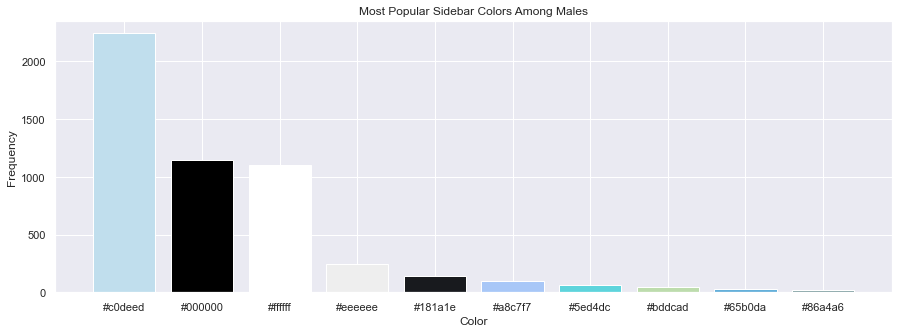

In [10]:
# Plotting Most Popular Sidebar Colors Among Males
plt.figure(figsize=(15,5))
plt.bar(male_colors['sidebar_color'][:10],male_colors['_unit_id'][:10],color=list(male_colors['sidebar_color'][:10]))
plt.title('Most Popular Sidebar Colors Among Males')
plt.xlabel('Color')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

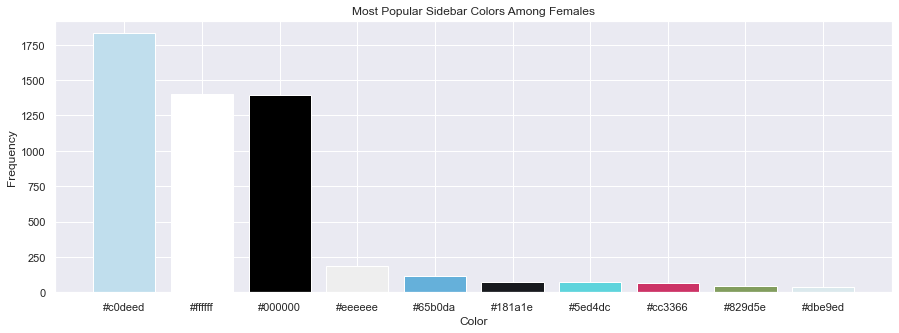

In [11]:
# Plotting Most Popular Sidebar Colors Among Females
female_colors = female.groupby('sidebar_color').aggregate({'_unit_id':pd.Series.nunique}).sort_values('_unit_id',ascending=False)
female_colors = female_colors.reset_index()
female_colors['sidebar_color'] = female_colors['sidebar_color'].str.lower()
female_colors['sidebar_color'] = female_colors['sidebar_color'].apply(lambda x:x.zfill(6))
female_colors['sidebar_color'] = female_colors['sidebar_color'].apply(lambda x:'#'+x)
female_colors['sidebar_color'] = female_colors['sidebar_color'].apply(lambda x:'#'+''.join(re.findall('[A-Za-z0-9]',x)))

plt.figure(figsize=(15,5))
plt.bar(female_colors['sidebar_color'][:10],female_colors['_unit_id'][:10],color=list(female_colors['sidebar_color'][:10]))
plt.title('Most Popular Sidebar Colors Among Females')
plt.xlabel('Color')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

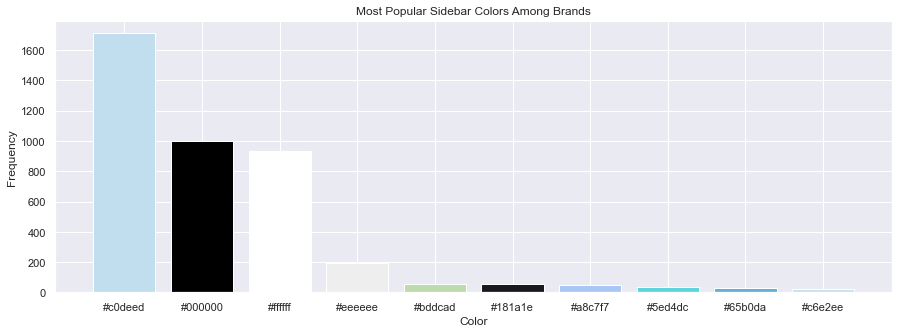

In [12]:
# Plotting Most Popular Sidebar Colors Among Brands
brand_colors = brand.groupby('sidebar_color').aggregate({'_unit_id':pd.Series.nunique}).sort_values('_unit_id',ascending=False)
brand_colors = brand_colors.reset_index()
brand_colors['sidebar_color'] = brand_colors['sidebar_color'].str.lower()
brand_colors['sidebar_color'] = brand_colors['sidebar_color'].apply(lambda x:x.zfill(6))
brand_colors['sidebar_color'] = brand_colors['sidebar_color'].apply(lambda x:'#'+x)
brand_colors['sidebar_color'] = brand_colors['sidebar_color'].apply(lambda x:'#'+''.join(re.findall('[A-Za-z0-9]',x)))

plt.figure(figsize=(15,5))
plt.bar(brand_colors['sidebar_color'][:10],brand_colors['_unit_id'][:10],color=list(brand_colors['sidebar_color'][:10]))
plt.title('Most Popular Sidebar Colors Among Brands')
plt.xlabel('Color')
plt.ylabel('Frequency')

After looking at the most popular sidebar colors by gender we can see that some of the standard colors like light blue, black and white are the most popular across men, women and brands. However, there are some colors which are more popular among certain groups like blue among men, pink among women and green among brands.

In [13]:
# Checking No. of Unique Sidebar Colors Used by Each Gender
male_colors = male_colors.rename(columns={'_unit_id':'male_count'})
female_colors = female_colors.rename(columns={'_unit_id':'female_count'})
brand_colors = brand_colors.rename(columns={'_unit_id':'brand_count'})

print("No. of Male Colors: ",male_colors.shape[0])
print("No. of Female Colors: ",female_colors.shape[0])
print("No. of Brand Colors: ",brand_colors.shape[0])

No. of Male Colors:  173
No. of Female Colors:  255
No. of Brand Colors:  155


We see that women seem to use a larger variety of colors as compared to men and brands.

Since we didn't see much of a trend by looking at the most popular sidebar color among each group, let us look at the difference of no. of users between groups for each color.

In [14]:
# Computing Difference in User Count Among Genders for Each Color
all_colors = pd.merge(male_colors,female_colors,how='outer')
all_colors = pd.merge(all_colors,brand_colors,how='outer')
all_colors.fillna(0)

all_colors['m+f'] = all_colors['male_count'] + all_colors['female_count']
all_colors['f+b'] = all_colors['female_count'] + all_colors['brand_count']
all_colors['m+b'] = all_colors['male_count'] + all_colors['brand_count']

all_colors['male_diff'] = all_colors['male_count'] - all_colors['f+b']
all_colors['female_diff'] = all_colors['female_count'] - all_colors['m+b']
all_colors['brand_diff'] = all_colors['brand_count'] - all_colors['m+f']

all_colors.head(10)

,sidebar_color,male_count,female_count,brand_count,m+f,f+b,m+b,male_diff,female_diff,brand_diff
0,#c0deed,2242.0,1830.0,1711.0,4072.0,3541.0,3953.0,-1299.0,-2123.0,-2361.0
1,#000000,1147.0,1394.0,997.0,2541.0,2391.0,2144.0,-1244.0,-750.0,-1544.0
2,#ffffff,1104.0,1399.0,935.0,2503.0,2334.0,2039.0,-1230.0,-640.0,-1568.0
3,#eeeeee,242.0,188.0,191.0,430.0,379.0,433.0,-137.0,-245.0,-239.0
4,#181a1e,145.0,70.0,53.0,215.0,123.0,198.0,22.0,-128.0,-162.0
5,#a8c7f7,96.0,34.0,45.0,130.0,79.0,141.0,17.0,-107.0,-85.0
6,#5ed4dc,62.0,70.0,36.0,132.0,106.0,98.0,-44.0,-28.0,-96.0
7,#bddcad,50.0,29.0,54.0,79.0,83.0,104.0,-33.0,-75.0,-25.0
8,#65b0da,31.0,113.0,26.0,144.0,139.0,57.0,-108.0,56.0,-118.0
9,#86a4a6,24.0,26.0,6.0,50.0,32.0,30.0,-8.0,-4.0,-44.0


Text(0, 0.5, 'Difference in Frequency')

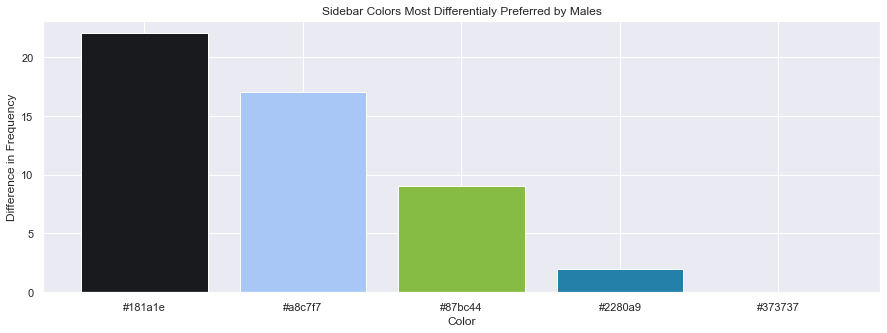

In [15]:
# Plotting Colors Most Differentially Preferred by Males
excl_male = all_colors.sort_values('male_diff',ascending=False)

plt.figure(figsize=(15,5))
plt.bar(excl_male['sidebar_color'][:5],excl_male['male_diff'][:5],color=list(excl_male['sidebar_color'][:5]))
plt.title('Sidebar Colors Most Differentialy Preferred by Males')
plt.xlabel('Color')
plt.ylabel('Difference in Frequency')

Text(0, 0.5, 'Difference in Frequency')

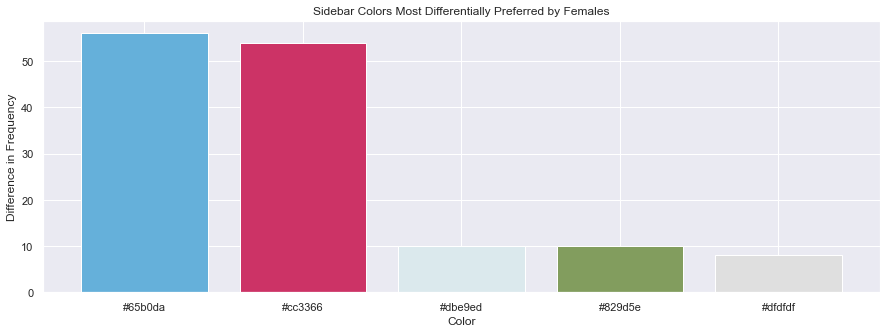

In [16]:
# Plotting Colors Most Differentially Preferred by Females
excl_female = all_colors.sort_values('female_diff',ascending=False)

plt.figure(figsize=(15,5))
plt.bar(excl_female['sidebar_color'][:5],excl_female['female_diff'][:5],color=list(excl_female['sidebar_color'][:5]))
plt.title('Sidebar Colors Most Differentially Preferred by Females')
plt.xlabel('Color')
plt.ylabel('Difference in Frequency')

Text(0, 0.5, 'Difference in Frequency')

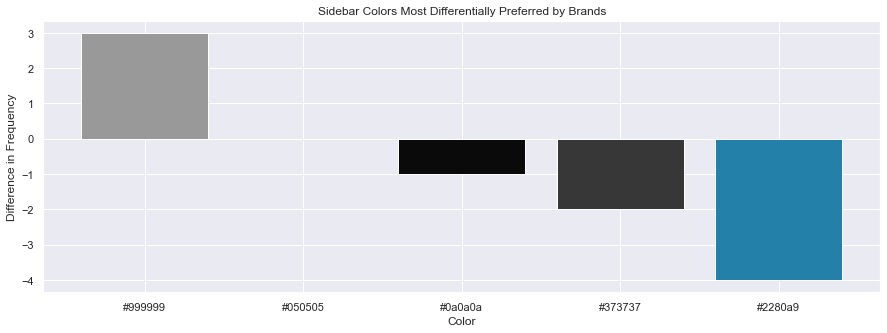

In [17]:
# Plotting Colors Most Differentially Preferred by Brands
excl_brand = all_colors.sort_values('brand_diff',ascending=False)

plt.figure(figsize=(15,5))
plt.bar(excl_brand['sidebar_color'][:5],excl_brand['brand_diff'][:5],color=list(excl_brand['sidebar_color'][:5]))
plt.title('Sidebar Colors Most Differentially Preferred by Brands')
plt.xlabel('Color')
plt.ylabel('Difference in Frequency')

Now we see that that differentially, men use colors like black and blue more often while women use colors like pink and olive green. Brands seem to use more of dark grey in comparison to men and women.

Now, let's try and see if we can see any difference in the no. of tweets among the three groups.

female    5641
male      5335
brand     4079
Name: gender, dtype: int64


Text(0, 0.5, 'Tweet Count')

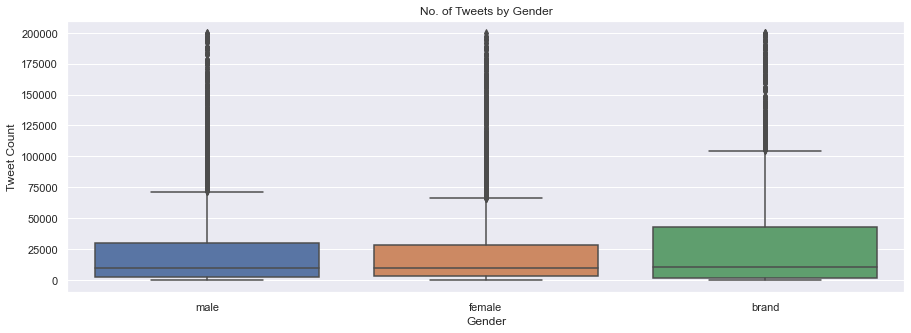

In [18]:
# Plotting Distribution of No. of Tweets by Gender
tweet_one_df = profile_df[profile_df['tweet_count'] > 0]
tweet_one_df = tweet_one_df[tweet_one_df['tweet_count'] < 200000]
print(tweet_one_df['gender'].value_counts())

plt.figure(figsize=(15,5))
sns.boxplot(x=tweet_one_df['gender'],y=tweet_one_df['tweet_count'])
plt.title('No. of Tweets by Gender')
plt.xlabel('Gender')
plt.ylabel('Tweet Count')

While the average tweet count seems to be similar across all three groups, we see that brands have a larger interquartile range compared to men and women. This can be attributed to a larger variety of brand activity on social media.

Now let's see if we can find any differences in the length of profile descriptions among the groups.

Text(0, 0.5, 'Description Length')

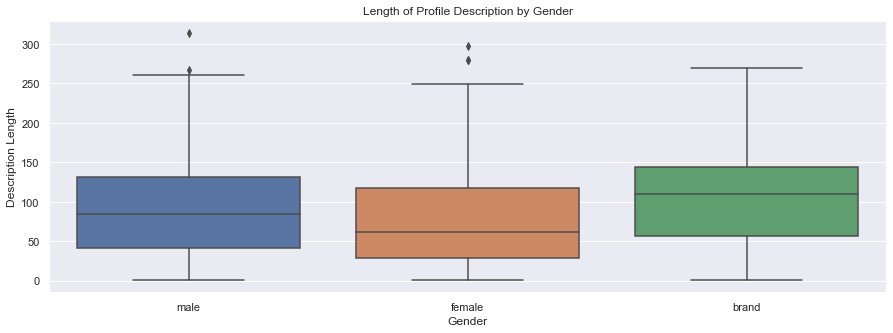

In [19]:
# Plotting Distribution of Length of Profile Description by Gender
profile_df['desc_length'] = profile_df['description'].apply(lambda x:len(str(x)))

plt.figure(figsize=(15,5))
sns.boxplot(x=profile_df['gender'],y=profile_df['desc_length'])
plt.title('Length of Profile Description by Gender')
plt.xlabel('Gender')
plt.ylabel('Description Length')

From the box-plot above we see that on average brands have a longer profile description followed by men while women have the shortest descriptions among all the groups. In general, brands might have larger desriptions as they would need to be more descriptive for people to identify with the brand.

Now, we will be checking if we can find any trends with respect to the time of profile creation among the three groups.

In [20]:
# Formatting Date-Time of Profile Creation
import datetime

male_time = male[['description','created']]
male_time['time'] = male_time['created'].apply(lambda x:datetime.datetime.strptime(x,"%m/%d/%y %H:%M"))
male_time.head(10)

<ipython-input-20-b463858aa2bb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_time['time'] = male_time['created'].apply(lambda x:datetime.datetime.strptime(x,"%m/%d/%y %H:%M"))


,description,created,time
0,i sing my own rhythm.,12/5/13 1:48,2013-12-05 01:48:00
1,I'm the author of novels filled with family dr...,10/1/12 13:51,2012-10-01 13:51:00
2,louis whining and squealing and all,11/28/14 11:30,2014-11-28 11:30:00
3,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",6/11/09 22:39,2009-06-11 22:39:00
7,The secret of getting ahead is getting started.,12/3/12 21:54,2012-12-03 21:54:00
17,"Over enthusiastic F1 fan. Model collector, mu...",10/18/09 11:41,2009-10-18 11:41:00
23,You had me from the start,1/11/13 1:18,2013-01-11 01:18:00
24,BSc economics graduate #COYS,4/21/11 12:21,2011-04-21 12:21:00
29,RL/writer | Lewd aspiring femboy who enjoys on...,3/24/14 2:57,2014-03-24 02:57:00
31,Award Winning Author of the paranormal Romance...,12/5/12 6:18,2012-12-05 06:18:00


In [21]:
# Rolling Up No. of Profiles Created by Hour of the Day
male_time_count = male_time['time'].groupby(male_time['time'].dt.hour).count()
male_time_count

time
0     111
1     135
2     117
3     145
4     149
5     166
6     223
7     240
8     279
9     303
10    279
11    307
12    327
13    361
14    338
15    293
16    272
17    260
18    229
19    225
20    203
21    219
22    168
23    120
Name: time, dtype: int64

In [22]:
# Replicating the Process for Females and Brands
female_time = female[['description','created']]
female_time['time'] = female_time['created'].apply(lambda x:datetime.datetime.strptime(x,"%m/%d/%y %H:%M"))
female_time_count = female_time['time'].groupby(female_time['time'].dt.hour).count()

brand_time = brand[['description','created']]
brand_time['time'] = brand_time['created'].apply(lambda x:datetime.datetime.strptime(x,"%m/%d/%y %H:%M"))
brand_time_count = brand_time['time'].groupby(brand_time['time'].dt.hour).count()

<ipython-input-22-16f75002d371>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_time['time'] = female_time['created'].apply(lambda x:datetime.datetime.strptime(x,"%m/%d/%y %H:%M"))
<ipython-input-22-16f75002d371>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_time['time'] = brand_time['created'].apply(lambda x:datetime.datetime.strptime(x,"%m/%d/%y %H:%M"))


<BarContainer object of 24 artists>

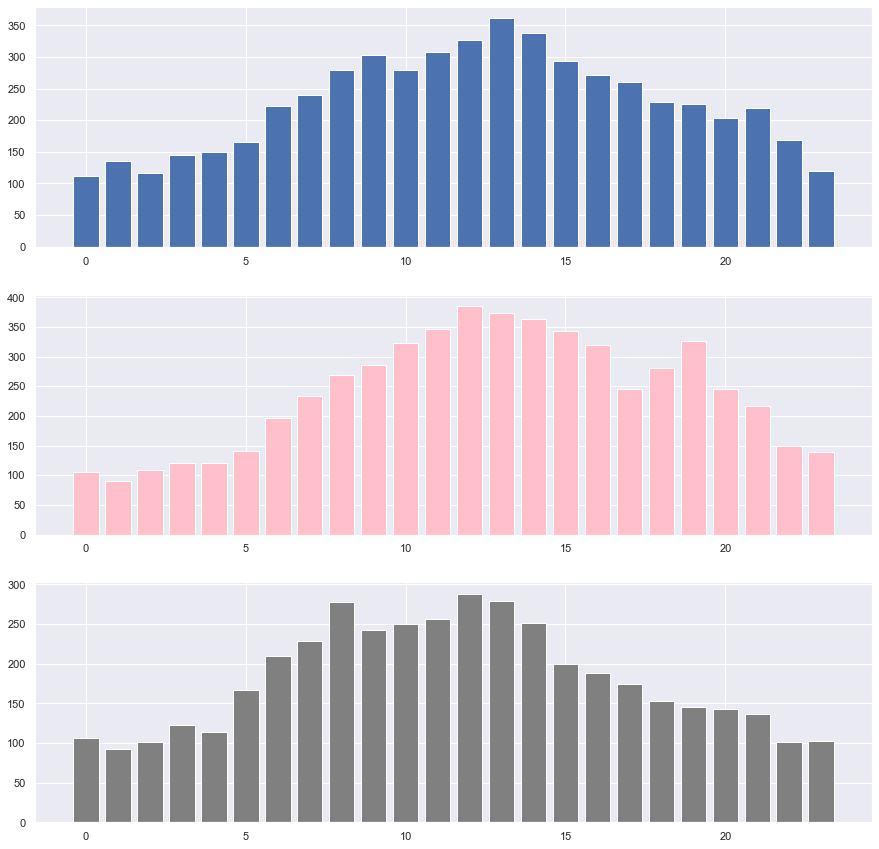

In [23]:
# Plotting No. of Profiles Created by Hour of the Day - By Gender
import matplotlib.gridspec as gridspec

plt.figure(figsize=(15,15))
gspec = gridspec.GridSpec(3,1)
male_time_dist = plt.subplot(gspec[0,0:])
female_time_dist = plt.subplot(gspec[1,0:])
brand_time_dist = plt.subplot(gspec[2,0:])

male_time_dist.bar(male_time_count.index,male_time_count.values)
female_time_dist.bar(female_time_count.index,female_time_count.values,color='pink')
brand_time_dist.bar(brand_time_count.index,brand_time_count.values,color='grey')

We see that across all three groups, the most popular time for profile cration seems to be around noon. Men see an increase in no. of profiles created around 9pm while women see this spike around 7pm. This gives us an idea of when these groups are most active on social media.

### 2. Cleaning Text Data
To be able to use the data from the description column for prediction, we will first have to clean this data and convert it into a matrix with corresponding word occurences for the most popular words. Our first step for this will be extracting only the label column (which in this case is gender) and the column with the features (description column).

In [24]:
# Extracting Data Required for Prediction
desc_data = profile_df[['gender','description']]
print(desc_data['gender'].value_counts())

def gender_replace(x):
    if x == "male":
        return 0
    elif x == "female":
        return 1
    else:
        return 2
    
desc_data['gender'] = desc_data['gender'].apply(lambda x:gender_replace(x))
desc_data = desc_data[desc_data['gender'] < 2]
print(desc_data['gender'].value_counts())
desc_data.head(10)

female    5725
male      5469
brand     4328
Name: gender, dtype: int64
1    5725
0    5469
Name: gender, dtype: int64


<ipython-input-24-7fcd64c4218b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desc_data['gender'] = desc_data['gender'].apply(lambda x:gender_replace(x))


,gender,description
0,0,i sing my own rhythm.
1,0,I'm the author of novels filled with family dr...
2,0,louis whining and squealing and all
3,0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,1,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
5,1,you don't know me.
7,0,The secret of getting ahead is getting started.
8,1,Pll Fan // Crazy about MCD // Ramen is bae
9,1,"Renaissance art historian, University of Notti..."
12,1,Senior '16 . XI-XII-MMXIV.


In [25]:
# Taking a Sample Profile Description
sample_desc = desc_data['description'][120]
sample_desc

'Journalist and producer with @camanpour on @cnni. Always open to a spicy taco. Views are my own, RT ��� endorsement, duh.'

We will now use the regex library to extract only the alphabetical characters, hence removing numbers and special characters. We will then remove stopwords and convert all words to their root forms.

In [26]:
# Extracting Only Text Without Numbers, Punctuation and Special Characters
sample_desc = re.sub("[^a-zA-Z]"," ",sample_desc)
sample_desc = sample_desc.lower()
sample_desc

'journalist and producer with  camanpour on  cnni  always open to a spicy taco  views are my own  rt     endorsement  duh '

In [27]:
# Importing Stop Words
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords

print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/trishaljadhav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/trishaljadhav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/trishaljadhav/nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data]   Package wordnet is already up-to-date!


In [28]:
# Storing Words in a List
sample_desc = nltk.word_tokenize(sample_desc)
print(sample_desc)

['journalist', 'and', 'producer', 'with', 'camanpour', 'on', 'cnni', 'always', 'open', 'to', 'a', 'spicy', 'taco', 'views', 'are', 'my', 'own', 'rt', 'endorsement', 'duh']


In [29]:
# Removing Stop Words
sample_desc = [word for word in sample_desc if word not in stopwords.words('english')]
print(sample_desc)

['journalist', 'producer', 'camanpour', 'cnni', 'always', 'open', 'spicy', 'taco', 'views', 'rt', 'endorsement', 'duh']


In [30]:
# Finding Root for All Words
lemma = nltk.WordNetLemmatizer()
sample_desc = [lemma.lemmatize(word) for word in sample_desc]
print(sample_desc)

['journalist', 'producer', 'camanpour', 'cnni', 'always', 'open', 'spicy', 'taco', 'view', 'rt', 'endorsement', 'duh']


In [31]:
# Converting Back Into a Sentence
sample_desc = " ".join(sample_desc)
sample_desc

'journalist producer camanpour cnni always open spicy taco view rt endorsement duh'

Now, lets define a function which we can use to clean all the rows of text in the description column. We can use this function as an input when we use the Count Vectorizer function to convert our text into a sparse matrix.

In [32]:
# Defining Function for Cleaning Text
def desc_process(desc):
    desc = re.sub("[^a-zA-Z]"," ",str(desc))
    desc = desc.lower()
    desc = nltk.word_tokenize(desc)
    desc = [word for word in desc if word not in stopwords.words('english')]
    desc = [lemma.lemmatize(word) for word in desc]
    return desc

desc_data_clean = desc_data.copy()
desc_data_clean['description'] = desc_data_clean['description'].apply(lambda x:" ".join(desc_process(x)))
desc_data_clean.head(10)

,gender,description
0,0,sing rhythm
1,0,author novel filled family drama romance
2,0,louis whining squealing
3,0,mobile guy er shazam google kleiner perkins ya...
4,1,ricky wilson best frontman kaiser chief best b...
5,1,know
7,0,secret getting ahead getting started
8,1,pll fan crazy mcd ramen bae
9,1,renaissance art historian university nottingha...
12,1,senior xi xii mmxiv


Now that we have a cleaned version of our description column, lets plot the most popular words among men and women using a word cloud.

In [33]:
# Splitting Clean Datasets by Gender
male_desc = desc_data_clean[desc_data_clean['gender'] == 0]
female_desc = desc_data_clean[desc_data_clean['gender'] == 1]

male_desc_full = " ".join(male_desc['description'].to_list())
female_desc_full = " ".join(female_desc['description'].to_list())

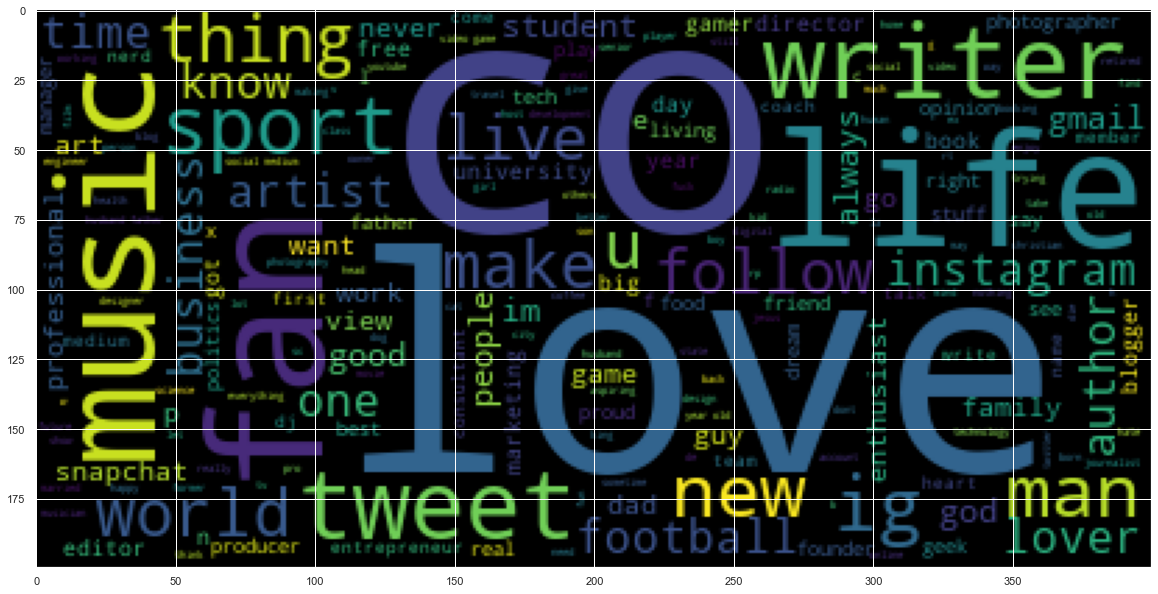

In [34]:
# Generating Word Cloud for Words Most Used by Males
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(male_desc_full))

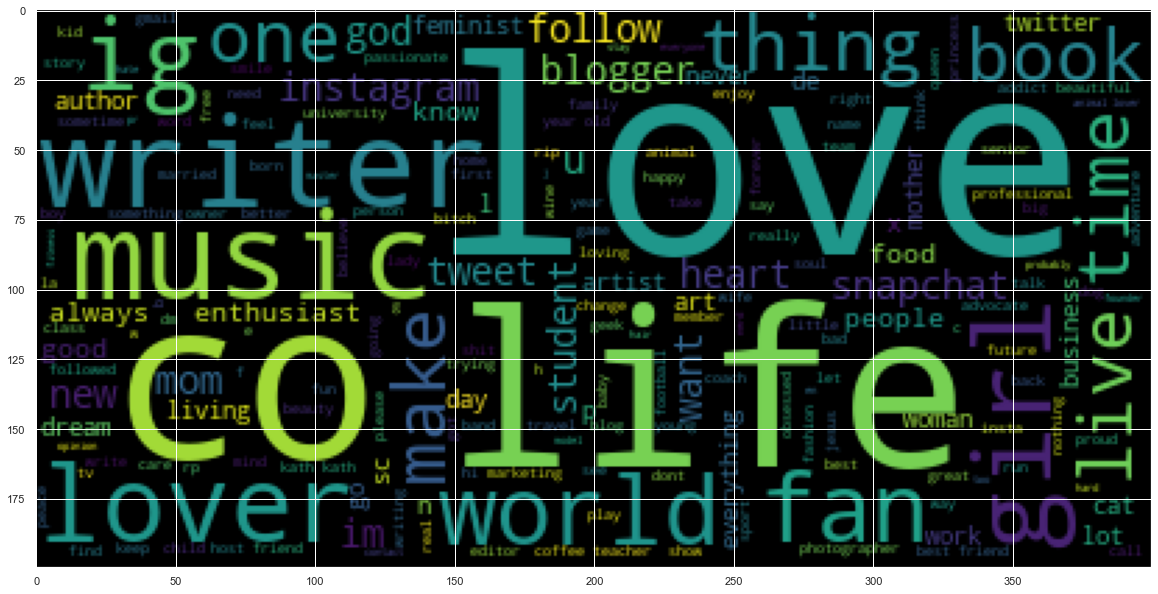

In [35]:
# Generating Word Cloud for Words Most Used by Females
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(female_desc_full))

We see that some of the most prominent words like "love","life" and "music" are common across both men and women. However, there seem to be some words which are exclusive to each group such as "man","sport" and "football" among men and "girl","book" and "heart" among women. While these nuances may be related to identification, interests and preferences of each group, the most popular words seem to be common across both. Not only does this foreshadow a low accuracy in prediction of gender but more importantly it tells us that male and female profiles might not be that easy to differentiate from and individual identity seems to be more gender neutral.

Now, lets use the Count Vectorizer function from sklearn to convert our top 5000 words and their occurences into a sparse matrix.

In [36]:
# Tokenizing Top 5000 Words Using Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer=desc_process,max_features=5000,stop_words='english')
profile_desc_vect = vectorizer.fit_transform(desc_data['description'])

In [37]:
# Printing Top 5000 Words
print("Top 5000 words in description: ",vectorizer.get_feature_names())

Top 5000 words in description:  ['aa', 'aaron', 'abc', 'aberdeen', 'absolutely', 'absurdity', 'abuse', 'ac', 'academic', 'academy', 'acc', 'accept', 'access', 'accident', 'account', 'accountant', 'acct', 'ace', 'achieve', 'achieved', 'achievement', 'across', 'act', 'acting', 'action', 'active', 'activist', 'activity', 'actor', 'actress', 'actual', 'actually', 'ad', 'adalah', 'adam', 'add', 'added', 'addict', 'addicted', 'addiction', 'admin', 'administrator', 'adopted', 'adore', 'adult', 'advance', 'adventure', 'adventurer', 'adventurous', 'advertising', 'advice', 'adviser', 'advisor', 'advocate', 'aesthetic', 'af', 'afc', 'affair', 'affiliate', 'affiliated', 'aficionado', 'afraid', 'africa', 'african', 'afrikaner', 'afro', 'afternoon', 'ag', 'age', 'agency', 'agent', 'agile', 'ago', 'agree', 'ah', 'aha', 'ahead', 'ahs', 'ai', 'aim', 'aime', 'aiming', 'aint', 'air', 'airplane', 'aj', 'aka', 'al', 'alabama', 'album', 'alcohol', 'ale', 'alex', 'alfie', 'ali', 'alice', 'alien', 'alive', 'a

In [38]:
# Printing Sparse Matrix
print(profile_desc_vect.toarray())
print(profile_desc_vect.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(11194, 5000)


In [39]:
# Defining Feautures Dataset
X = profile_desc_vect.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
# Defining Labels Dataset
y = desc_data['gender']
y

0        0
1        0
2        0
3        0
4        1
        ..
20045    1
20046    0
20047    0
20048    1
20049    1
Name: gender, Length: 11194, dtype: int64

Before we use our feature and label datasets for prediction, let's split them into train and test datasets with a 90:10 ratio.

In [41]:
# Performing Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 42)

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (10074, 5000)
X_test Shape:  (1120, 5000)
y_train Shape:  (10074,)
y_test Shape:  (1120,)


### 3. Implementing ML Models
Now that we have the words from our description column as our features dataset and gender values as our labels dataset, lets train a few popular ML models on the training data and look at their accuracy on both the training and test datasets.

In [42]:
# Multinomial Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
y_pred_train_nb = nb_clf.predict(X_train)
y_pred_test_nb = nb_clf.predict(X_test)

print("Train Accuracy = ",accuracy_score(y_pred_train_nb,y_train)*100,"%")
print("Test Accuracy = ",accuracy_score(y_pred_test_nb,y_test)*100,"%")

Train Accuracy =  77.88366090927138 %
Test Accuracy =  65.53571428571429 %


In [43]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=2000)
lr_clf.fit(X_train,y_train)
y_pred_train_lr = lr_clf.predict(X_train)
y_pred_test_lr = lr_clf.predict(X_test)

print("Train Accuracy = ",accuracy_score(y_pred_train_lr,y_train)*100,"%")
print("Test Accuracy = ",accuracy_score(y_pred_test_lr,y_test)*100,"%")

Train Accuracy =  83.72046853285686 %
Test Accuracy =  66.42857142857143 %


In [44]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)
y_pred_train_rf = rf_clf.predict(X_train)
y_pred_test_rf = rf_clf.predict(X_test)

print("Train Accuracy = ",accuracy_score(y_pred_train_rf,y_train)*100,"%")
print("Test Accuracy = ",accuracy_score(y_pred_test_rf,y_test)*100,"%")

Train Accuracy =  96.73416716299384 %
Test Accuracy =  65.0 %


In [45]:
# XGBoost Model
import xgboost
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(random_state=0)
xgb_clf.fit(X_train,y_train)
y_pred_train_xgb = xgb_clf.predict(X_train)
y_pred_test_xgb = xgb_clf.predict(X_test)

print("Train Accuracy = ",accuracy_score(y_pred_train_xgb,y_train)*100,"%")
print("Test Accuracy = ",accuracy_score(y_pred_test_xgb,y_test)*100,"%")

Train Accuracy =  63.222156045265045 %
Test Accuracy =  59.910714285714285 %


In [46]:
# Voting Ensemble Model
from sklearn.ensemble import VotingClassifier

vt_clf = VotingClassifier(estimators = [('RandomForest', rf_clf),('LogisticRegression',lr_clf), ('NaiveBayes', nb_clf), ('XGBoost', xgb_clf)], voting="hard", n_jobs=-1)
vt_clf.fit(X_train, y_train)
y_pred_train_vt = vt_clf.predict(X_train)
y_pred_test_vt = vt_clf.predict(X_test)

print("Train Accuracy = ",accuracy_score(y_pred_train_vt,y_train)*100,"%")
print("Test Accuracy = ",accuracy_score(y_pred_test_vt,y_test)*100,"%")

Train Accuracy =  85.55687909469923 %
Test Accuracy =  68.30357142857143 %


### 4. Conclusion
Among all of our models, the ensemble model for Voting Classifier with Random Forest, Logistic Regression, Naive Bayes and XGBoost gave us the best accuracy of **68.3%** on the test data. Let's use the predictions from this model to get a classification report and a confusion matrix.

In [47]:
# Obtaining Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test_vt, digits = 3))

              precision    recall  f1-score   support

           0      0.710     0.639     0.672       570
           1      0.661     0.729     0.693       550

    accuracy                          0.683      1120
   macro avg      0.685     0.684     0.683      1120
weighted avg      0.686     0.683     0.683      1120



Text(111.5, 0.5, 'Truth')

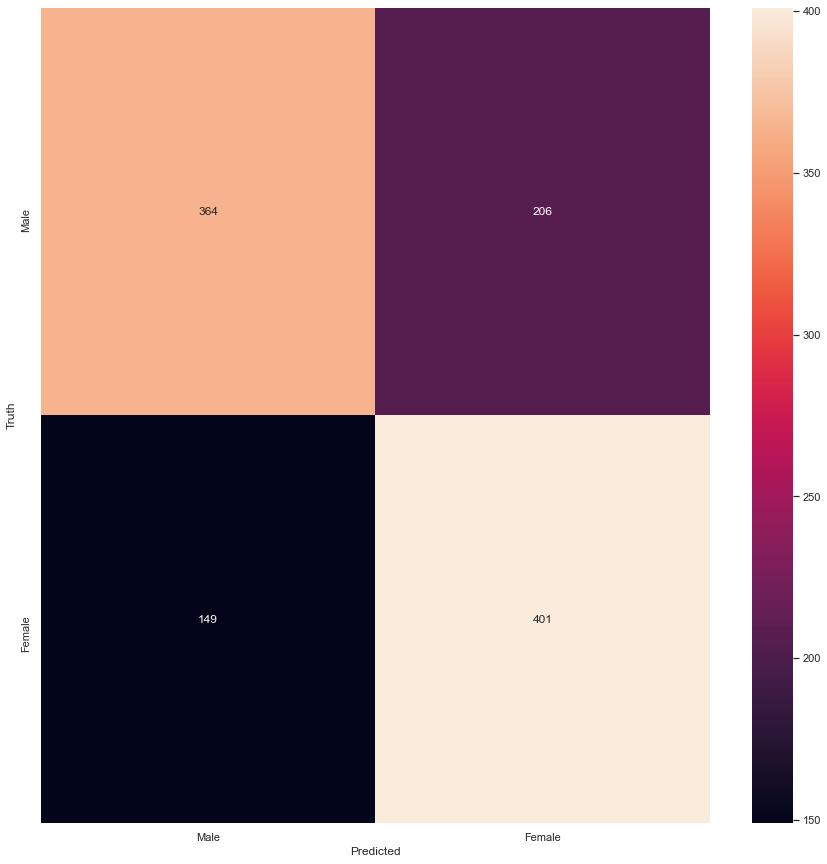

In [48]:
# Obtaining Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_test_vt)

# Visualizing Confusion Matrix
plt.figure(figsize = (15,15))
sns.heatmap(cm, annot=True, fmt='d')
plt.xticks([i+0.5 for i in range(0,2)],["Male","Female"])
plt.yticks([i+0.5 for i in range(0,2)],["Male","Female"])
plt.xlabel('Predicted')
plt.ylabel('Truth')

While our overall accuracy was low, we see through our confusion matrix that our model predicted larger number of males as females than females as males. This led to a higher precision score for the male class and a higher recall score for the female class.

With only two genders, a random prediction would give us an accuracy of 50% while our best model gave us an accuracy of only 68%. Rather than looking at this as a failure of our approach, I feel the real insight lies in the fact that our digital society is no longer held back by gender stereotypes. With a louder support for the LGBTQ+ community and more acceptance towards individuals who drift away from the stereotypical man and woman, a distinct individual identity is more desirable than an identity as a male or a female. The area where this is the most evident is social media and our analysis provides a great example of this. It is now completely normal for a man to have an interest in fashion and a woman to be interested in sports, the kind of interests which would end up in the description of one's twitter profile.

Through this project I gained a valuable insight into the social media universe and this further fires my passion for Data Science because it shows that with data we can gain a better understanding of the world around us.